https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

위의 데이터셋을 불러와서 분류하는 모델을 만들어봅시다. 


ImageFolder함수 대신 Dataset을 subclassing하여 custom dataset을 만들어 사용해 봅시다

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

__init__, __len__, __getitem__ 을 재정의해줍니다. 

```
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

class Brain(Dataset):
    def __init__(self):
        pass

    def __len__(self):
        pass

    def __getitem__(self, index):
        pass
```

In [ ]:
import os  
from PIL import Image

우선 이미지를 불러와봅시다

In [ ]:
# 폴더 경로 지정
path = '/content/drive/MyDrive/Teaching/DL 202301/brain_tumar'

In [ ]:
files = os.listdir(path+'/yes')  # 폴더에 있는 파일 불러오기

In [ ]:
files

['Y194.jpg',
 'Y120.JPG',
 'Y22.jpg',
 'Y13.jpg',
 'Y107.jpg',
 'Y112.JPG',
 'Y192.JPG',
 'Y164.JPG',
 'Y24.jpg',
 'Y10.jpg',
 'Y169.jpg',
 'Y163.JPG',
 'Y162.jpg',
 'Y16.JPG',
 'Y183.jpg',
 'Y155.JPG',
 'Y184.JPG',
 'Y105.jpg',
 'Y170.JPG',
 'Y157.JPG',
 'Y182.JPG',
 'Y185.jpg',
 'Y113.JPG',
 'Y111.JPG',
 'Y12.jpg',
 'Y148.JPG',
 'Y102.jpg',
 'Y101.jpg',
 'Y160.JPG',
 'Y21.jpg',
 'Y153.jpg',
 'Y15.jpg',
 'Y116.JPG',
 'Y168.jpg',
 'Y147.JPG',
 'Y104.jpg',
 'Y195.JPG',
 'Y103.jpg',
 'Y19.JPG',
 'Y193.JPG',
 'Y20.jpg',
 'Y188.jpg',
 'Y165.JPG',
 'Y11.jpg',
 'Y23.JPG',
 'Y167.JPG',
 'Y108.jpg',
 'Y146.JPG',
 'Y115.JPG',
 'Y14.jpg',
 'Y114.JPG',
 'Y106.jpg',
 'Y180.jpg',
 'Y117.JPG',
 'Y159.JPG',
 'Y1.jpg',
 'Y2.jpg',
 'Y166.JPG',
 'Y181.jpg',
 'Y109.JPG',
 'Y187.jpg',
 'Y18.JPG',
 'Y161.JPG',
 'Y186.jpg',
 'Y17.jpg',
 'Y154.jpg',
 'Y100.JPG',
 'Y156.JPG',
 'Y158.JPG',
 'Y75.JPG',
 'Y32.jpg',
 'Y259.JPG',
 'Y62.jpg',
 'Y7.jpg',
 'Y41.jpg',
 'Y47.JPG',
 'Y52.jpg',
 'Y252.jpg',
 'Y51.jpg',
 

In [ ]:
imgs = []

for file in files:  # 파일명 순회
  file_path = os.path.join(path+'/yes', file) # 경로 + 파일명
  img = Image.open(file_path) # 이미지 열기
  imgs.append(img) # 리스트에 추가

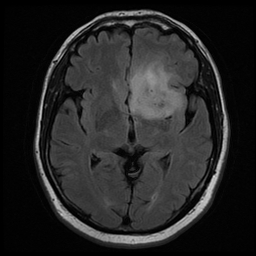

In [ ]:
imgs[0]

In [ ]:
imgs[0].size

(256, 256)

numpy로 변환해보고, 배열 사이즈 확인을 해봅시다

In [ ]:
import numpy as np
img = np.array(imgs[0])

In [ ]:
img.shape

(256, 256, 3)

파이토치 학습에 맞도로 컬러채널 위치를 변경해줍니다

In [ ]:
img = img.transpose(2,0,1)

In [ ]:
img.shape

(3, 256, 256)

이제 클래스로 만들어봅시다. 

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import numpy as np

class Brain(Dataset):
    def __init__(self, path = None):
        if path is None: path = '/content/drive/MyDrive/Teaching/DL 202301/brain_tumar'

        imgs = []
        
        # yes 폴더에 있는 파일 불러오기
        files = os.listdir(path+'/yes') 
        for file in files:  # 파일명 순회
          try:
            file_path = os.path.join(path+'/yes', file) # 경로 + 파일명
            img = Image.open(file_path).convert('RGB') # RGB로 이미지 열기
            img_np = np.array(img).transpose(2,0,1)
            imgs.append((img_np, 1)) # 리스트에 추가   # yes = 1로 지정
          except:
            print(img.size, file)
        
        files = os.listdir(path+'/no')  
        for file in files:  # 파일명 순회
          file_path = os.path.join(path+'/no', file) # 경로 + 파일명
          img = Image.open(file_path).convert('RGB') # 이미지 열기
          img_np = np.array(img).transpose(2,0,1)
          imgs.append((img, 0)) # 리스트에 추가   # no = 0으로 지정

        # 내부 변수에 저장
        self.data = imgs

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
brain = Brain()

In [ ]:
brain[0][0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [ ]:
brain[0][1]

1